In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%matplotlib notebook

In [3]:
disney_path = "Data/disney_plus_titles.csv"
disney_file = pd.read_csv(disney_path)
disney_file.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


In [4]:
disney_file.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [5]:
reduced_file = disney_file.drop_duplicates(subset="title")

In [6]:
reduced_file.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [7]:
reduced_file['converted_date_added'] = pd.to_datetime(reduced_file['date_added'])
reduced_file.dtypes

show_id                         object
type                            object
title                           object
director                        object
cast                            object
country                         object
date_added                      object
release_year                     int64
rating                          object
duration                        object
listed_in                       object
description                     object
converted_date_added    datetime64[ns]
dtype: object

In [8]:
reduced_file = reduced_file.sort_values(by="converted_date_added")
reduced_file.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,converted_date_added
1430,s1431,Movie,Blackbeard's Ghost,Robert Stevenson,"Peter Ustinov, Dean Jones, Suzanne Pleshette, ...",United States,"October 1, 2019",1968,G,107 min,"Comedy, Family, Fantasy",A track coach inherits the mischievous ghost o...,2019-10-01
1438,s1439,Movie,Those Calloways,Norman Tokar,"Brian Keith, Vera Miles, Brandon de Wilde, Wal...",United States,"October 1, 2019",1965,PG,132 min,"Animals & Nature, Drama, Family",A strong-willed family struggles to establish ...,2019-10-01
1437,s1438,Movie,The Sword in the Stone,Wolfgang Reitherman,"Sebastian Cabot, Karl Swenson, Rickie Sorensen...",United States,"October 1, 2019",1963,G,80 min,"Action-Adventure, Animation, Comedy",Merlin trains a young orphan who's destined to...,2019-10-01
1436,s1437,Movie,The Great Mouse Detective,"John Musker, Ron Clements, Dave Michener","Vincent Price, Barrie Ingham, Val Bettin, Susa...",United States,"October 1, 2019",1986,G,75 min,"Animation, Family, Mystery",A super-sleuth mouse must solve a toy maker's ...,2019-10-01
1435,s1436,Movie,The Cat from Outer Space,Norman Tokar,"Ken Berry, Sandy Duncan, Harry Morgan, Roddy M...",United States,"October 1, 2019",1978,G,104 min,"Comedy, Family, Science Fiction",A physicist tries to help an alien cat after i...,2019-10-01


In [9]:
filtered_reduced_file = reduced_file.loc[reduced_file['converted_date_added']>='2019-11-01']
filtered_reduced_file.head()
# len(filtered_reduced_file)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,converted_date_added
947,s948,Movie,"Honey, I Shrunk the Kids",Joe Johnston,"Rick Moranis, Matt Frewer, Marcia Strassman, K...","United States, Mexico","November 12, 2019",1989,PG,94 min,"Action-Adventure, Comedy, Family",Inventor Wayne Szalinski accidentally shrinks ...,2019-11-12
948,s949,Movie,"Honey, We Shrunk Ourselves",Dean Cundey,"Rick Moranis, Eve Gordon, Robin Bartlett, Alli...",United States,"November 12, 2019",1997,PG,76 min,"Action-Adventure, Comedy, Fantasy","This time, Wayne Szalinski's shrink machine is...",2019-11-12
949,s950,Movie,Horse Sense,Greg Beeman,"Joey Lawrence, Andy Lawrence, Susan Walters, M...",United States,"November 12, 2019",1999,TV-G,92 min,"Coming of Age, Drama",Spoiled Michael spends a summer at his cousin ...,2019-11-12
950,s951,TV Show,Hostile Planet,NaN,Bear Grylls,United States,"November 12, 2019",2019,TV-PG,1 Season,"Animals & Nature, Docuseries, Survival",Hostile Planet reveals the animal kingdom’s ep...,2019-11-12
723,s724,Movie,Alley Cats Strike!,Rod Daniel,"Kyle Schmid, Robert Ri'chard, Kaley Cuoco, Mim...","United States, Canada","November 12, 2019",2000,TV-G,87 min,"Coming of Age, Drama, Sports",Four outcast teens with a love of bowling are ...,2019-11-12


In [10]:
#count null values
filtered_reduced_file.isna().sum()

show_id                   0
type                      0
title                     0
director                469
cast                    190
country                 219
date_added                0
release_year              0
rating                    3
duration                  0
listed_in                 0
description               0
converted_date_added      0
dtype: int64

In [11]:
# count data by type
type_data = filtered_reduced_file['type'].value_counts()
type(type_data)
type_data

Movie      1043
TV Show     394
Name: type, dtype: int64

<IPython.core.display.Javascript object>


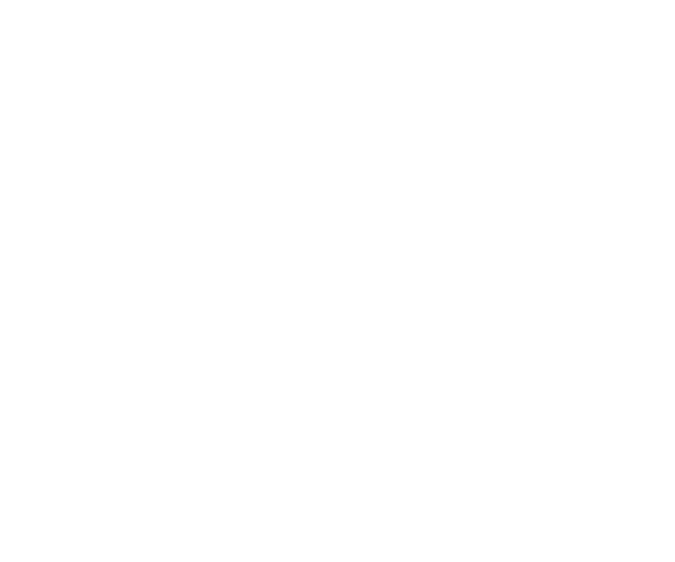

In [12]:
fig, axs = plt.subplots(1,2)

#produce a map of type
figure1 = type_data.plot(kind = "bar", figsize=(6,5),color="blue", title="Disney+ shows by Type",ax=axs[0])
figure1.set_xlabel("Type")
figure1.set_ylabel("Count")
# Configure x-tick rotation
xticklabels = type_data.index
figure1.set_xticklabels(xticklabels, rotation=45, rotation_mode="anchor", ha="right", wrap=True)

#pie chart
figure2 = type_data.plot(kind = "pie", labels = type_data.index, figsize=(6,5),colors=['red','green'], explode = (0.1,0),autopct='%1.1f%%',shadow=True, startangle=90, title="Disney+ shows by Type",ax=axs[1])
plt.axis('equal')
plt.tight_layout()


In [13]:
#map by country
country_data = filtered_reduced_file['country'].value_counts()
country_data_map = country_data.head(10)
country_data_map

United States                    994
United States, Canada             30
United Kingdom                    23
United States, United Kingdom     22
Canada, United States             17
United Kingdom, United States     14
United States, Australia           7
Canada                             5
United States, France              4
United States, Japan               4
Name: country, dtype: int64

In [14]:
#produce a map of type
figure3 = country_data_map.plot(kind = "barh", figsize=(6,5),color="blue", title="Disney+ shows by Country")
figure3.set_xlabel("Country")
figure3.set_ylabel("Count")
# Configure x-tick rotation
yticklabels = country_data_map.index
figure3.set_yticklabels(yticklabels, rotation_mode="anchor", ha="right", wrap=True)
plt.show()
plt.tight_layout()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,converted_date_added
5,s6,Movie,Becoming Cousteau,Liz Garbus,"Jacques Yves Cousteau, Vincent Cassel",United States,"November 24, 2021",2021,PG-13,94 min,"Biographical, Documentary",An inside look at the legendary life of advent...,2021-11-24
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.,2021-11-26
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!",2021-11-26
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...,2021-11-26
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!,2021-11-26


Populating the interactive namespace from numpy and matplotlib


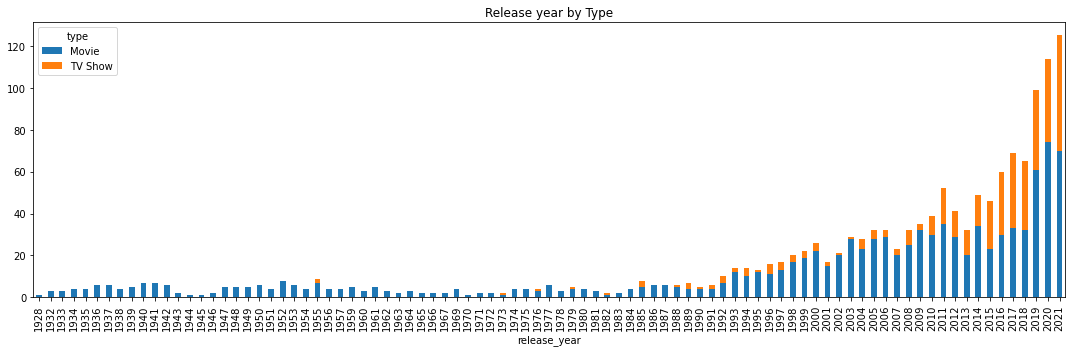

In [16]:
#map release year by type
%pylab inline
df = filtered_reduced_file.groupby(['type', 'release_year'])['release_year'].count().unstack('type').fillna(0)
df
df[['Movie',  'TV Show']].plot(kind='bar', stacked=True, figsize=(15, 5), title='Release year by Type')
plt.tight_layout()

Populating the interactive namespace from numpy and matplotlib


C:\Users\tnguyen59\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


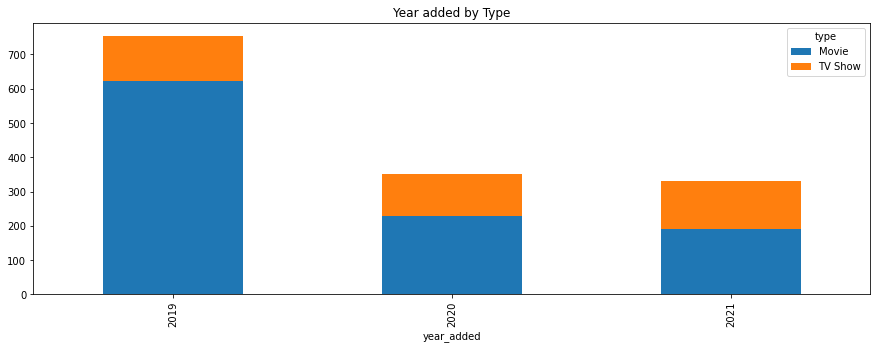

In [17]:
#map year added by type
%pylab inline
filtered_reduced_file['year_added'] =filtered_reduced_file['date_added'].str[-4:]
filtered_reduced_file
year_added_gb = filtered_reduced_file.groupby(['type', 'year_added'])['year_added'].count().unstack('type').fillna(0)
year_added_gb
year_added_gb[['Movie',  'TV Show']].plot(kind='bar', stacked=True, figsize=(15, 5), title='Year added by Type')
# plt.tight_layout()

Populating the interactive namespace from numpy and matplotlib


C:\Users\tnguyen59\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


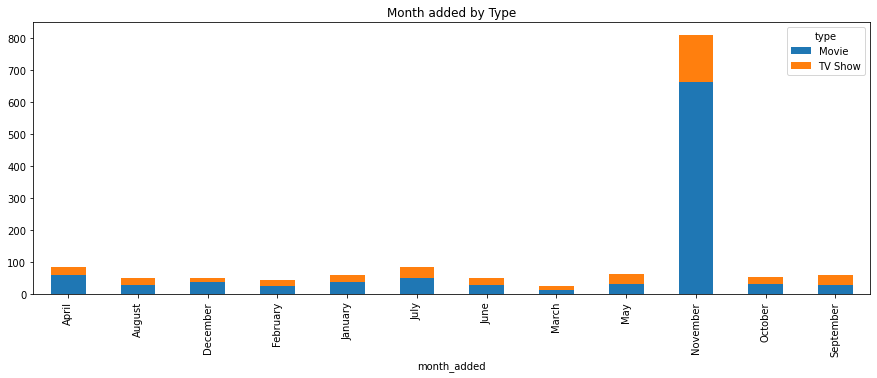

In [18]:
#map month added by type
%pylab inline
filtered_reduced_file['month_added'] =filtered_reduced_file['date_added'].str.split().str.get(0)
filtered_reduced_file

year_added_gb = filtered_reduced_file.groupby(['type', 'month_added'])['month_added'].count().unstack('type').fillna(0)
year_added_gb
year_added_gb[['Movie',  'TV Show']].plot(kind='bar', stacked=True, figsize=(15, 5), title='Month added by Type')
# plt.tight_layout()

[Text(0, 0, 'TV-G'),
 Text(0, 0, 'TV-PG'),
 Text(0, 0, 'G'),
 Text(0, 0, 'PG'),
 Text(0, 0, 'TV-Y7'),
 Text(0, 0, 'TV-14'),
 Text(0, 0, 'PG-13'),
 Text(0, 0, 'TV-Y'),
 Text(0, 0, 'TV-Y7-FV')]

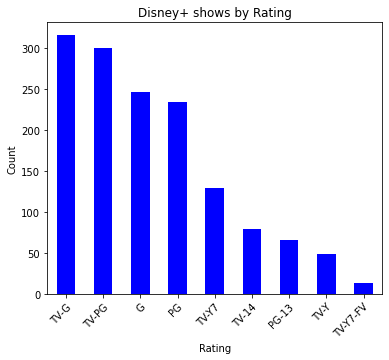

In [21]:
# map by rating
rating_data = filtered_reduced_file['rating'].value_counts()

#produce a map of type
figure6 = rating_data.plot(kind = "bar", figsize=(6,5),color="blue", title="Disney+ shows by Rating")
figure6.set_xlabel("Rating")
figure6.set_ylabel("Count")
# Configure x-tick rotation
xticklabels = rating_data.index
figure6.set_xticklabels(xticklabels, rotation=45, rotation_mode="anchor", ha="right", wrap=True)

In [22]:
# filter by Movie
movie_df = filtered_reduced_file.loc[reduced_file['type']=='Movie',:]
movie_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,converted_date_added,year_added,month_added
5,s6,Movie,Becoming Cousteau,Liz Garbus,"Jacques Yves Cousteau, Vincent Cassel",United States,"November 24, 2021",2021,PG-13,94 min,"Biographical, Documentary",An inside look at the legendary life of advent...,2021-11-24,2021,November
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.,2021-11-26,2021,November
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!",2021-11-26,2021,November
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...,2021-11-26,2021,November
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!,2021-11-26,2021,November


In [37]:
# movie_df['duration no'] = movie_df['duration'].str.split().str.get(0)
movie_df['duration(int)'] = pd.to_numeric(movie_df['duration'].str.split().str.get(0))
movie_df.dtypes

C:\Users\tnguyen59\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


show_id                         object
type                            object
title                           object
director                        object
cast                            object
country                         object
date_added                      object
release_year                     int64
rating                          object
duration                        object
listed_in                       object
description                     object
converted_date_added    datetime64[ns]
year_added                      object
month_added                     object
duration(int)                    int64
duration no                     object
dtype: object

C:\Users\tnguyen59\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


[Text(0, 0, '90mins+'),
 Text(0, 0, '75-90 mins'),
 Text(0, 0, '<15mins'),
 Text(0, 0, '30-60mins'),
 Text(0, 0, '60-75 mins'),
 Text(0, 0, '15-30mins')]

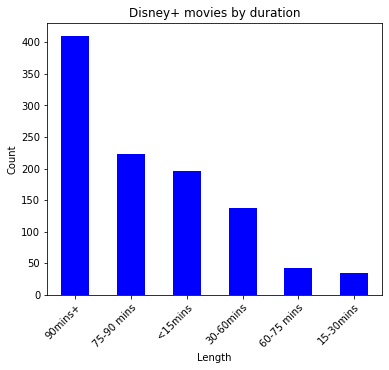

In [44]:
# map by movie length
bins = [0,15,30,60,75,90,300]
labels = ['<15mins', '15-30mins','30-60mins', '60-75 mins', '75-90 mins','90mins+']
movie_df['duration interval'] = pd.cut(movie_df['duration(int)'],bins=bins, labels=labels)
length_data = movie_df['duration interval'].value_counts()
#produce a graph by movie length
figure7 = length_data.plot(kind = "bar", figsize=(6,5),color="blue", title="Disney+ movies by duration")
figure7.set_xlabel("Length")
figure7.set_ylabel("Count")
# Configure x-tick rotation
xticklabels = length_data.index
figure7.set_xticklabels(xticklabels, rotation=45, rotation_mode="anchor", ha="right", wrap=True)

In [27]:
#filter by TV show
tvshow_df = filtered_reduced_file.loc[reduced_file['type']=='TV Show',:]
tvshow_df.head()

'99 min'

[Text(0, 0, '1 Season'),
 Text(0, 0, '2 Seasons'),
 Text(0, 0, '3 Seasons'),
 Text(0, 0, '4 Seasons'),
 Text(0, 0, '5 Seasons'),
 Text(0, 0, '7 Seasons'),
 Text(0, 0, '6 Seasons'),
 Text(0, 0, '8 Seasons'),
 Text(0, 0, '9 Seasons'),
 Text(0, 0, '10 Seasons'),
 Text(0, 0, '16 Seasons'),
 Text(0, 0, '32 Seasons'),
 Text(0, 0, '19 Seasons')]

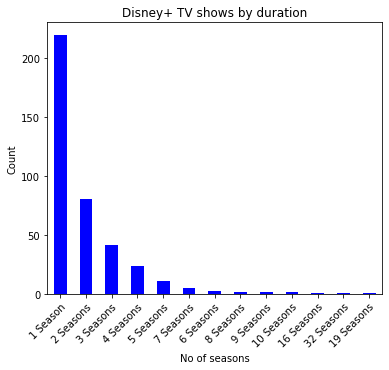

In [45]:
season_data = tvshow_df['duration'].value_counts()
#produce a graph by TV show seasons
figure8 = season_data.plot(kind = "bar", figsize=(6,5),color="blue", title="Disney+ TV shows by duration")
figure8.set_xlabel("No of seasons")
figure8.set_ylabel("Count")
# Configure x-tick rotation
xticklabels = season_data.index
figure8.set_xticklabels(xticklabels, rotation=45, rotation_mode="anchor", ha="right", wrap=True)